
# Project: Sales Forecast Prediction

## Objective

To forecast sales for a retail company using time series data. We will use advanced machine learning techniques, specifically **Facebook Prophet** for time-series forecasting. The goal is to build a scalable and accurate forecasting system.




## Project Definition & Planning

### Scope

- **Build a forecasting model** that can predict sales based on historical data.
- Ensure the model can handle **seasonality, trend changes, and missing data**.
- The solution must be **scalable** for large datasets and should provide insights through **visualizations**.

### Deliverables

- **Time-series forecasting model** using Facebook Prophet.
- **Well-documented code**, easily shareable via GitHub.
- **Detailed analysis and reporting** of results with visualizations.



In [31]:
import pandas as pd
from prophet import Prophet


data = pd.read_csv('Dataset.csv')


data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Data Cleaning

- **Handling Missing Values, ouliers and incorrect values**


- **Time-series consistency:** Ensure that your Date column is properly formatted as a datetime object.

In [34]:
print(data.isna().sum())

data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


data.fillna(method='ffill', inplace=True)

data.info()

sample_data = data.sample(frac=0.01)
sample_data

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2360,17,2011-06-24,920719.98,0,60.99,3.668,129.066300,6.774
4155,30,2010-04-02,457884.06,0,64.12,2.719,210.479887,8.200
1763,13,2010-12-31,1675292.00,1,26.79,2.868,127.087677,7.795
5312,38,2010-07-02,361181.48,0,91.98,3.105,126.139200,14.180
2177,16,2010-09-17,522049.52,0,56.55,2.800,190.468829,6.868
...,...,...,...,...,...,...,...,...
2536,18,2012-02-10,1161615.51,1,32.83,3.655,137.166677,8.075
4339,31,2011-01-14,1350730.31,0,34.14,2.983,211.117671,8.028
19,1,2010-06-18,1503284.06,0,84.11,2.637,211.453772,7.808
6388,45,2011-12-09,957155.31,0,46.57,3.415,188.654469,8.523


## Features Engineering

- For now we will focus on **Date** and **Weekly_Sales**

## Rename Columns for Prophet

- As prophet expected, we'll rename our **Date** and **Weekly_Sales** columns as\
**ds** and **y** respectfully

In [27]:
feature_data = sample_data[['Date', 'Weekly_Sales']]

feature_data = feature_data.rename(columns={'Date':'ds', 'Weekly_Sales':'y'})

feature_data.head(10)

,ds,y
348366,2010-03-26,1284.93
1483,2011-02-11,17711.78
208866,2010-06-18,36810.81
285670,2011-04-15,4621.69
189785,2011-04-29,75.00
144893,2010-12-31,1685.00
351603,2010-10-15,10477.10
401063,2010-02-12,51168.66
179374,2010-11-26,21319.72
98310,2010-11-26,32513.54


## Exploratory Data Analysis

We Visualize the data to understand the patterns

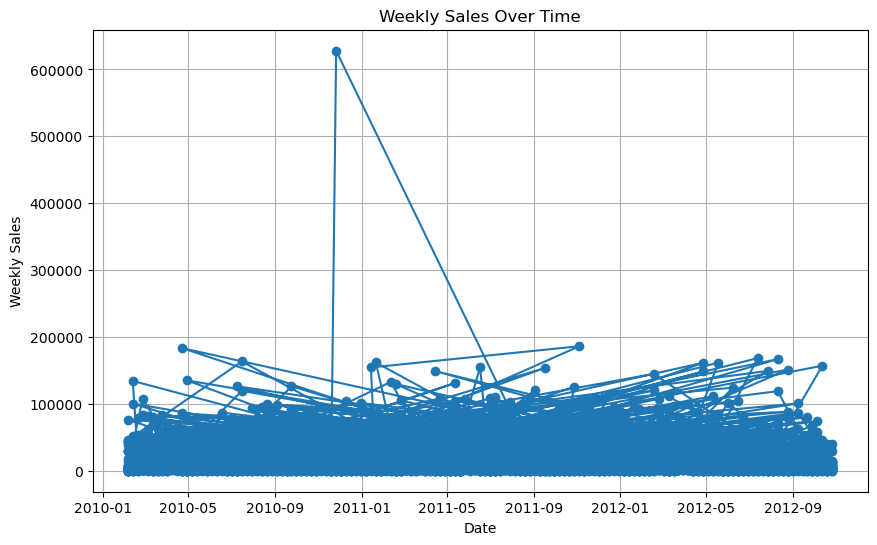

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(feature_data['ds'], feature_data['y'], label="Sales", marker='o', linestyle='-')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

#Plot not really cool !

## Model Tuning with facebook Prophet

In [40]:
model =Prophet()


model.fit(feature_data)


future = model.make_future_dataframe(periods=90)

focast = model.predict(future)

focast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


15:54:59 - cmdstanpy - INFO - Chain [1] start processing
15:54:59 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2010-02-05,15493.501297,-15440.138772,46353.768732
1,2010-02-12,16442.639415,-12182.934705,46036.045316
2,2010-02-19,17213.049500,-13928.869913,48029.025428
3,2010-02-26,17353.868245,-14331.465567,47597.175805
4,2010-03-05,16672.549863,-13675.059276,46473.543303
...,...,...,...,...
228,2013-01-20,11328.592075,-18479.562436,41785.766451
229,2013-01-21,11356.386369,-17766.166303,42071.204085
230,2013-01-22,11396.884307,-19128.315118,41369.813963
231,2013-01-23,11448.757931,-19031.540109,40610.786604


##  Visualization of Predictions


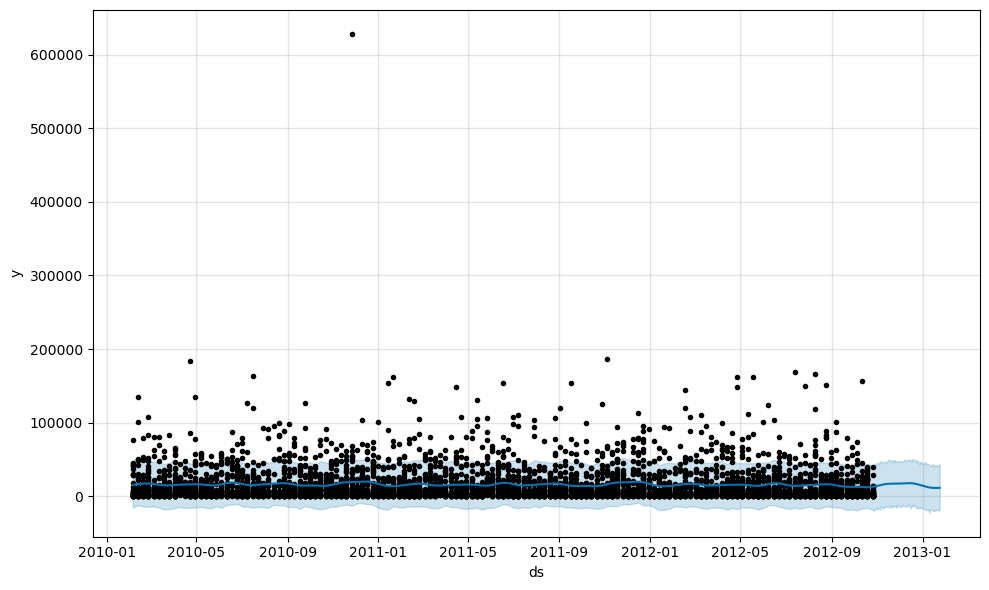

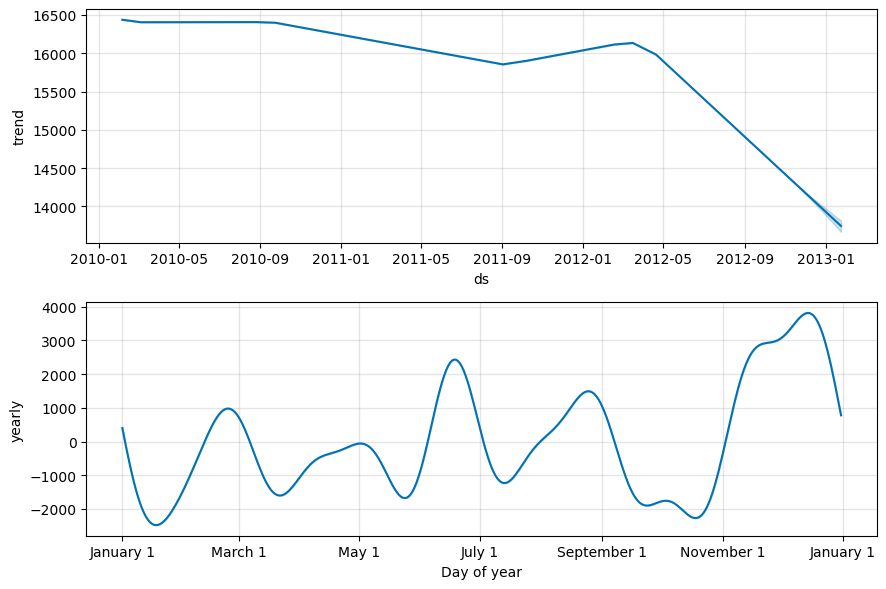

In [47]:
fig1 = model.plot(focast)

fig2 = model.plot_components(focast)

## Model Evaluation


In [53]:

from prophet.diagnostics import cross_validation, performance_metrics


cv_results = cross_validation(model, initial='366 days', period='180 days', horizon='90 days')



df_p = performance_metrics(cv_results)


df_p.head()

  0%|          | 0/3 [00:00<?, ?it/s]

16:04:35 - cmdstanpy - INFO - Chain [1] start processing
16:04:35 - cmdstanpy - INFO - Chain [1] done processing
16:04:35 - cmdstanpy - INFO - Chain [1] start processing
16:04:36 - cmdstanpy - INFO - Chain [1] done processing
16:04:36 - cmdstanpy - INFO - Chain [1] start processing
16:04:36 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,11 days,2.249488e+08,14998.294165,12375.665018,151.732494,1.470818,1.051066,0.982456
1,13 days,6.406433e+08,25310.932241,16212.335998,260.195334,0.905407,1.045120,0.912281
2,16 days,6.600455e+08,25691.351266,17057.563014,251.548373,1.077374,1.091525,0.912281
3,18 days,8.951144e+08,29918.462266,18661.324434,159.864015,0.888606,1.095335,0.877193
4,20 days,8.073054e+08,28413.119531,17350.417512,1735.804882,0.909063,1.050407,0.886248
